# Assignment 5
## Nistha Agarwal
## 210010045

### Importing all the required packages and libraries

In [1]:
import numpy as np #used to deal with arrays and related operations
import pandas as pd #used to convert our csv file to a dataframe and perform desired operations on it
import matplotlib.pyplot as plt #used to make various mathematical plots
import seaborn as sns #contains additional plot features
import statsmodels.api as sm #used for qq plot
import scipy.stats as stats #This module contains a large number of probability distributions, summary and frequency statistics, correlation functions and statistical tests, masked statistics, and more.
import math # contains the math functions like min, mx, sqrt
import sympy as sym #package used to solve equations for unknown variables 

## Question 1

### Converting our excel data file to pandas dataframe

In [2]:
#converting our csv file into a pandas dataframe for successful EDA
df = pd.read_excel('NDAP_percentage_file.xlsx') #reading csv file into "df" dataframe
#df_new = pd.read_excel('NDAP_percentage_file.xlsx')
df = df.fillna(0) # filling all blank percentage cells as zero because their corresponding housing data had zero as the cell value
df.head() #df.head() gives us a preview of the first few rows of the dataframe

,Unnamed: 0,Rowid,Country,State lgd code,State,District lgd code,District,Year,Type of residence namely rural or urban,Number of census houses,...,Percentage of Houses having grass or thatch or bamboo etc. as material of wall,Percentage of Houses having plastic or polythene as material of wall,Percentage of Houses having mud or unburnt brick as material of wall,Percentage of Houses having wood as material of wall,Percentage of Houses having stone not packed with mortar as material of wall,Percentage of Houses having stone packed with mortar as material of wall,Percentage of Houses having galvanized iron (gi) sheets or metal or asbestos sheets as material of wall,Percentage of Houses having burnt brick as material of wall,Percentage of Houses having concrete as material of wall,Percentage of Houses having any other material of wall
0,0,1,India,1,Jammu And Kashmir,1,Anantnag,2011,Rural,109465,...,0.246654,1.215914,20.746357,2.753391,2.771662,0.438496,0.209199,69.637784,1.278948,0.701594
1,1,2,India,1,Jammu And Kashmir,1,Anantnag,2011,Urban,33522,...,0.205835,0.360957,20.306068,0.366923,0.799475,0.277430,0.292345,70.965336,5.650021,0.775610
2,2,3,India,1,Jammu And Kashmir,2,Budgam,2011,Rural,85562,...,0.156612,0.197518,8.384563,1.121993,0.874220,0.357635,0.251280,85.717959,1.185106,1.751946
3,3,4,India,1,Jammu And Kashmir,2,Budgam,2011,Urban,13136,...,0.373021,0.205542,7.117844,0.182704,1.423569,0.228380,0.296894,86.000305,3.456151,0.715591
4,4,5,India,1,Jammu And Kashmir,3,Baramulla,2011,Rural,120312,...,0.341612,0.143793,15.965157,2.683024,10.433706,4.554824,1.446240,60.415420,1.760423,2.256633


### Filtering the data column we require from our dataset file

In [3]:
df_1=df.filter(['Percentage of Houses having mud or unburnt brick as material of wall']) #only filtering the 'percentage of houses with mud or unburnt brick' column we require 

In [4]:
df_1.head()#preview of filtered dataset

,Percentage of Houses having mud or unburnt brick as material of wall
0,20.746357
1,20.306068
2,8.384563
3,7.117844
4,15.965157


In [5]:
print('Number of rows in the dataframe = '+str(df.shape[0])) #shape parameter 0 refers to the rows of the dataframe

Number of rows in the dataframe = 1468


In [6]:
df_1 = df_1.sort_values(by=['Percentage of Houses having mud or unburnt brick as material of wall'], ascending = True)
print(df_1) #sorting the values in our column

      Percentage of Houses having mud or unburnt brick as material of wall
531                                            0.000000                   
198                                            0.000000                   
525                                            0.000000                   
1380                                           0.000000                   
579                                            0.000000                   
...                                                 ...                   
777                                           93.744415                   
902                                           95.713339                   
916                                           96.460369                   
936                                           96.460819                   
934                                           96.461278                   

[1468 rows x 1 columns]


### a)Examine Q-Q plots for Gaussian and uniform distributions, and visually assess which of the two is abetter fit

##### QQ plot for Gaussian Distribution

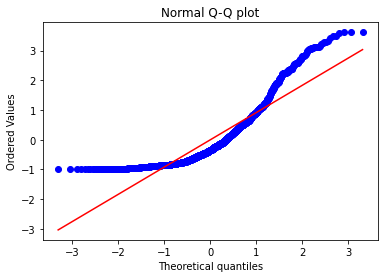

In [7]:
n = 1468 #number of enteries in our cleaned dataset
observation = df_1['Percentage of Houses having mud or unburnt brick as material of wall']/n  #mean of data values
  
z = (observation-np.mean(observation))/np.std(observation) #gaussian test statistic computation for the values of our datatset
  
stats.probplot(z, dist="norm", plot=plt) #ploting the qq plot ofor our datset
plt.title("Normal Q-Q plot") #adding title to our plot

plt.show()#displaying plot


Right skewed
can check with displot
displotr confirms

C:\Users\postn\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Percentage of Houses having mud or unburnt brick as material of wall', ylabel='Density'>

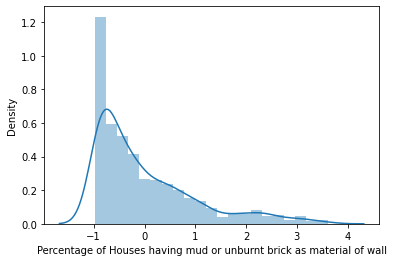

In [8]:
sns.distplot(z) #plotting histogram to just analytically visualize our dataset

##### QQ plot for Normal Distribution

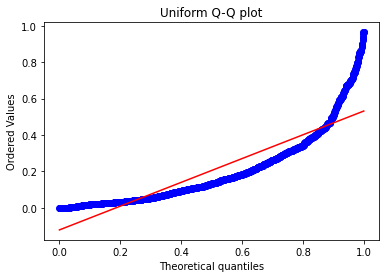

In [9]:
observation = df_1['Percentage of Houses having mud or unburnt brick as material of wall']/100 #to scale the valueas of y coordiantes
  
stats.probplot(observation, dist="uniform", plot=plt) # plotting qq plot for uniform distribution
plt.title("Uniform Q-Q plot") #adding title to plot

plt.show()

### b) Find out MLE parameter estimates for Gaussian distribution.

For Gaussian, MLE parameters are μ and σ:

their estimates are found by: 

$$ \mu \simeq x̄ = \frac{\Sigma x}{n}$$

and

$$ σ \simeq S = \sqrt\frac{\Sigma {(x_i - x̄)^2}}{n} $$

**Estimating μ**

In [10]:
sum_x = 0.0
for i in range(n):
    sum_x = sum_x + df_1.iloc[i]['Percentage of Houses having mud or unburnt brick as material of wall'] #summing up each cell entry of the dataset
mu = sum_x/n #calculating mu
print("Mean = " , mu)

Mean =  20.523306244783704


In [11]:
mu_np = np.mean(df_1['Percentage of Houses having mud or unburnt brick as material of wall']) #using numpy function to calculate mu and cross check previous result
print ("Mean =" , mu_np)

Mean = 20.523306244783704


**Estimating σ**

In [12]:
std_np = np.std(df_1['Percentage of Houses having mud or unburnt brick as material of wall']) #using numpy function to calculate standard deviation
print("Standard Deviation =" , std_np)

Standard Deviation = 20.98298931769971


In [13]:
sum_x2 = 0.0
for i in range(n):
    xi_mu = df_1.iloc[i]['Percentage of Houses having mud or unburnt brick as material of wall'] - mu #calculating deviation of cell entry from the data mean
    sum_x2 = sum_x2 +  xi_mu **2 #calculating square sum of deviation
sigma_sq = sum_x2/n
std = sigma_sq ** 0.5 #calculating standard eviation from variance
print("Standard Deviation =" , std)

Standard Deviation = 20.98298931769971


### c)Find out MLE parameter estimates for uniform distribution. 

likelihood function for uniform distribution = $\frac{1}{{(b-a)}^n}$

a = min($x_i$)

b = max($x_i$)

In [14]:
a = df_1['Percentage of Houses having mud or unburnt brick as material of wall'].loc[df['Percentage of Houses having mud or unburnt brick as material of wall'].idxmin()]      # Minimum in column
print("a = " ,a)

a =  0.0


In [15]:
b = df_1['Percentage of Houses having mud or unburnt brick as material of wall'].loc[df['Percentage of Houses having mud or unburnt brick as material of wall'].idxmax()]      # Maximum in column
print("b = " ,b)

b =  96.4612778406356


### d) Between Gaussian and uniform with MLE parameters, determine the one that is more likely toexplain the observed data. 

**Calculating negataive sum log likelihood value for normal distribution**

In [16]:
log_sum_norm =0 #to store negative log sum of terms of the likelihood function for a normal distribution
for i in range(n): #looping over all cell entries of the column
    x_i = df_1.iloc[i]['Percentage of Houses having mud or unburnt brick as material of wall'] #extracting cell value
    val = stats.norm.pdf(x_i, mu, std) #finding corresponding pdf value
    log_sum_norm = log_sum_norm - math.log(val) #calculating negative sum of log of pdf value for each entry
print(log_sum_norm) #printing final sum 

6551.171095750125


**Calculating negative sum of log likelihood value for normal function**

In [17]:
log_sum_uni = 0 #to store negative log sum of terms of the likelihood function for a uniform distribution
p_x = 1/ ( b-a)  # pdf value for each entry
log_sum_uni = -1 * n * math.log(p_x)  #calculating negative sum of log of pdf value for each entry
print(log_sum_uni)  #printing final sum 

6707.499959692815


We can observe that log_sum_uni $>$ log_sum_norm 

Therefore, the normal distribution better explains the observed data as we have calculated the negative sum of log likelihood

## Question 2

### Assume there is a new type of distribution called IQ (inverted quadratic) given by p(x) = 0.75 (1-x2) for |x| ≤ 1and p(x) = 0 for |x|>1.

### a)Write a python function to generate Q-Q plot for input samples with respect to the IQ function and use it for the percentage of houses made of 'mud or unburnt bricks' data

In [18]:
pip install pynverse #installling pyinverse package to calculate inverse of cdf

Note: you may need to restart the kernel to use updated packages.


ERROR: Invalid requirement: '#installling'


First, we'll have to find cdf of our function and its inverse (so we can enter percentile value (of area) and get the corresponding point on curve.

For x ϵ (-∞, -1] ⋃ [1, ∞), 
$$ cdf = 0 $$

For x ϵ [-1, 1],
$$ f(x) = \frac{3}{4}\cdot (1 - x^2)$$
$$ cdf = \int_{-1}^{x}f(x) dx $$
$$ cdf(x) = F(x) = \frac{3}{4} \cdot (x - \frac{x^3}{3}) + \frac{1}{2} $$
$$ $$

**Writing a python function to calculate the inverse of cdf required for the theoretical quantiles of QQ plot**

In [19]:
from pynverse import inversefunc
def inverse_val(v):
    f_x = (lambda x: 0.75 * (x - (x**3)/3) + 0.5) #defing our cdf function
    inverse = inversefunc(f_x,  domain=[-1, 1]) #restricting domain between -1 to 1 
    return inverse(v) #returing inverse value

In [20]:
x = []
for i in range(n):
    x_i = inverse_val(i/n) #calculating inverse of cdf for the n divsions between 0 and 1
    x.append(x_i) #storing them all in a list

Text(0.5, 1.0, 'QQ Plot')

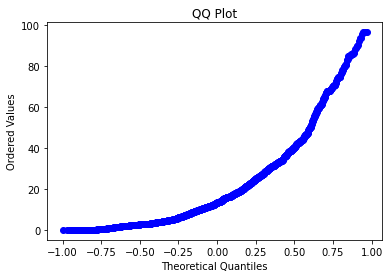

In [21]:
y = df_1['Percentage of Houses having mud or unburnt brick as material of wall']
plt.scatter(x, y, c ="blue") #creating a scatter plot of the datavalues against the theoretical values of given function

#assigning x and y labels
plt.xlabel('Theoretical Quantiles')
plt.ylabel('Ordered Values')

#assigning title
plt.title('QQ Plot')

### c) Write a python function that returns the MLE estimates of the parameters given a column of data.  

In [22]:
c, k = sym.symbols('c k') #defining shifting and scaling variables

In [ ]:
eq1 = 0
eq2 = 0
for i in range (51,55):
    x_i = df_1.iloc[i]['Percentage of Houses having mud or unburnt brick as material of wall']
    print(x_i)
    eq1 = eq1 + 1/(k + (x_i - c)) - 1/(k - (x_i - c))
    eq2 = eq2 - 3/k + 1/(k + (x_i - c)) + 1/(k - (x_i - c))
print(eq1)
print(eq2)
eq_c = sym.Eq(eq1, 0)
eq_k = sym.Eq(eq2, 0)
sol_dict = sym.solve((eq_c,eq_k), (c, k))
c = sol_dict[c]
k = sol_dict[k]
print(f'c = {sol_dict[c]}')
print(f'k = {sol_dict[k]}')

Here the above code has been written using the sympy package that is used to solve equations.

Due to the large number of data values it is taking a lot of time to solve for the required c and k.

Once we get the solutions we can just plug it in the following function that calculates log likelihood to get the log likelihood value of the data.

### d) Write a python function to compute data log likelihood for the parameterized IQ function, and use it to compute the log likelihood of the data from Q1 for the MLE estimate parameters.

In [23]:
def log_likelihood(c, k): #defining a function calculate log likelihood value that takes the mle parameters as input
    sum_log = 0 
    for i in range (n): #looping over each cell entry
        x_i = df_1.iloc[i]['Percentage of Houses having mud or unburnt brick as material of wall'] #extracting cell value
        fx_i = 0.75 * (k**2 - (x_i - c)**2) /(k**3)  #calculating pdf
        sum_log = sum_log + math.log(fx_i) #summing up log value of pdf
    return (sum_log) #returing log likelihood value

In [ ]:
log_likelihood_val = log_likelihood(c,k) #calling the log likelihood function by passing the required parameters
print(f'log likelihood of the data is ', log_likelihood_val) #printing the final result

The above two lines of code call the function that calculates the log likelihood value using the calculated MLE parameters c and k.

## Question 3

### a) Determine if the percent of houses across districts with “mud or unburnt brick” is really larger for rural versus urban in the housing data

Here since we do not know the exact distribution of our data we will perform a non parametric test.

Now from the question we can infer that the predictor is **Categorical Binary**, here *Rural vs Urban* and the outcome is numerically unpaired since we know that the housing in the urban vs rural areas is independent of the other.

Therefore we chose to perform the Wilcoxon rank-sum test.

The Wilcoxon rank-sum test tests the null hypothesis that two sets of measurements are drawn from the same distribution. The alternative hypothesis is that values in one sample are more likely to be larger than the values in the other sample.

In [24]:
#filtering the columns we require
df_2=df.filter(['District', 'Type of residence namely rural or urban', 'Percentage of Houses having mud or unburnt brick as material of wall'])
display(df_2)

,District,Type of residence namely rural or urban,Percentage of Houses having mud or unburnt brick as material of wall
0,Anantnag,Rural,20.746357
1,Anantnag,Urban,20.306068
2,Budgam,Rural,8.384563
3,Budgam,Urban,7.117844
4,Baramulla,Rural,15.965157
...,...,...,...
1463,Daman,Urban,1.005856
1464,Diu,Rural,0.924214
1465,Diu,Urban,0.113658
1466,Dadra And Nagar Haveli,Rural,13.948825


In [25]:
# grouping into two datasets
df_rural, df_urban = [x for _, x in df_2.groupby(df_2['Type of residence namely rural or urban'])]

In [26]:
display(df_rural)

,District,Type of residence namely rural or urban,Percentage of Houses having mud or unburnt brick as material of wall
0,Anantnag,Rural,20.746357
2,Budgam,Rural,8.384563
4,Baramulla,Rural,15.965157
6,Doda,Rural,4.367594
8,Jammu,Rural,10.070516
...,...,...,...
1458,Kargil,Rural,42.118897
1460,Leh Ladakh,Rural,59.006169
1462,Daman,Rural,3.596730
1464,Diu,Rural,0.924214


##### display:

In [27]:
display(df_urban)

,District,Type of residence namely rural or urban,Percentage of Houses having mud or unburnt brick as material of wall
1,Anantnag,Urban,20.306068
3,Budgam,Urban,7.117844
5,Baramulla,Urban,14.729570
7,Doda,Urban,7.086093
9,Jammu,Urban,2.956932
...,...,...,...
1459,Kargil,Urban,39.638989
1461,Leh Ladakh,Urban,89.736544
1463,Daman,Urban,1.005856
1465,Diu,Urban,0.113658


The p-value of less than 0.05 indicates that this test rejects the hypothesis at the 5% significance level.

Here we take the

Null hypotheis$(H_0)$ as both the rural and urban percentage of houses are of the same distribution

and the 

Alternative hypthesis$(H_a)$ as the percent of houses across districts with 'mud or unburnt brick' is really larger for rural vs urban data in the housing data

In [28]:
#wilcoxon rank sum test
urban = df_urban['Percentage of Houses having mud or unburnt brick as material of wall']
rural = df_rural['Percentage of Houses having mud or unburnt brick as material of wall']
statistic, p = stats.ranksums(rural, urban, alternative='greater') #using python function to directly calculate test statistic and p value
print (f'p-value =', p)

p-value = 1.1508416650662189e-31


Considering we take our $\alpha$ = 0.05

We can observe that the p value is way less than 0.05 and therefore we can easily reject our null hypotheis in favour of our alternative hypothesis.

**Result :  The percent of houses across districts with 'mud or unburnt brick is really larger for Rural vs Urban data in the Housing dataset** 

### b) Determine if either rural or urban percent of houses with “mud or unburnt brick” for the same district can be predicted using the other in the housing data.

Here we want to know if we can predict the rural or urban percent of houses with 'mud or unburt bricks' for the same district using the data values of the rural or urban percent of houses with any other material of the wall.

We are trying to find here if both the columns are related to each other not.
Since both the columns are of Numerical type and we want to find if there is a relation between them or not we will chose to perform the Spearman's Correlation Test.


The Spearman rank-order correlation coefficient is a nonparametric measure of the monotonicity of the relationship between two datasets. Unlike the Pearson correlation, the Spearman correlation does not assume that both datasets are normally distributed. Here we are unaware about the distribution of our dataset and therefore we chose to perform the spearman's correlation instead of Pearson's correlation test.

Like other correlation coefficients, this one varies between -1 and +1 with 0 implying no correlation. Correlations of -1 or +1 imply an exact monotonic relationship. Positive correlations imply that as x increases, so does y. Negative correlations imply that as x increases, y decreases.

In [29]:
#performing the spearman's correlation test to calculate spearman's coefficient and p value
coef, p = stats.spearmanr(urban,rural)
print("the spearmann's coefficient is ", coef," and the p value is", p)

the spearmann's coefficient is  0.6661330229946774  and the p value is 2.6234017244421608e-95


The coefficient value of 0.66 indicates that the rural and urban percentage of houses for the same district have a strong correlation and thep value being less than 0.05 tells us that we can easily reject our null hypothesis in favour of our alternate hypotheis that was that **we can use one housing data to predict the other for the same district**.

### c) Determine if there is a relation between body style and drive wheels in the automobile data

In [30]:
df_auto = pd.read_csv('Automobile_data.csv') #reading data file as pandas dataframe
display(df_auto) #displaying it

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.4,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.4,8.0,115,5500,18,22,17450
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,-1,95,volvo,gas,std,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845
201,-1,95,volvo,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045
202,-1,95,volvo,gas,std,four,sedan,rwd,front,109.1,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485
203,-1,95,volvo,diesel,turbo,four,sedan,rwd,front,109.1,...,145,idi,3.01,3.4,23.0,106,4800,26,27,22470


We can observe that both **drive-wheels** and **body-style** happen to be categorical variables and we need to find if there is a relation between them or not, that is are they dependent or independent of each other.

Thus we can perform the **Chi-Square Test of Independence** . It is to test if two variables are correlated to each other or not.

Here we will check if both **drive-wheels** and **body-style** data columns are related ro each other or not.

In [31]:
#converting categorical values into numeric type
from sklearn import preprocessing #importing the preprocessing library from scikit package
le = preprocessing.LabelEncoder() 
le.fit(df_auto['drive-wheels'])
df_auto['drive-wheels'] = le.transform(df_auto['drive-wheels'])
drive_wheels_labels = dict(zip(le.classes_, le.transform(le.classes_))) #converting categorical variables of 'drive-wheels' into numeric type and storing them as a dictionary
print(drive_wheels_labels)
le.fit(df_auto['body-style'])
df_auto['body-style'] = le.transform(df_auto['body-style'])
body_style_labels = dict(zip(le.classes_, 
                      le.transform(le.classes_)))#converting categorical variables of 'drive-wheels' into numeric type and storing them as a dictionary
print(body_style_labels)

{'4wd': 0, 'fwd': 1, 'rwd': 2}
{'convertible': 0, 'hardtop': 1, 'hatchback': 2, 'sedan': 3, 'wagon': 4}


[Text(0, 0, 'convertible'),
 Text(1, 0, 'hardtop'),
 Text(2, 0, 'hatchback'),
 Text(3, 0, 'sedan'),
 Text(4, 0, 'wagon')]

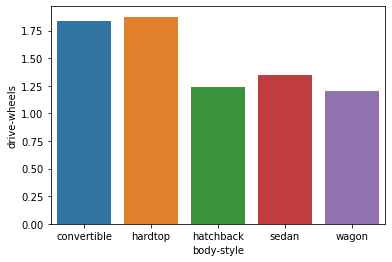

In [32]:
ax = sns.barplot(x='body-style', y='drive-wheels', data=df_auto, ci=None) #plotting a bar plot depicting the categorical variables of the two columns to visually asses the data
ax.set_xticklabels(body_style_labels.keys())

In [33]:
def contigency_table(df, col1, col2):  #defining a function to create a contigency table to successfully perform the chi2 test
    df_cont = pd.crosstab(index = df[col1], columns = df[col2])
    return df_cont

In [34]:
cont_table = contigency_table(df_auto,'drive-wheels', 'body-style') #creating the required table
display(cont_table) #displaying contigency table

body-style,0,1,2,3,4
drive-wheels,,,,,
0,0,0,2,3,4
1,1,1,49,57,12
2,5,7,19,36,9


Here the

Null hypotheis$(H_0)$  states that there is no relation between the variables

and the 

Alternative hypthesis$(H_a)$ state that there is a significant relation between the two

In [35]:
stat, p, dof, expected = stats.chi2_contingency(cont_table) #using python's chi2 function to directly calculate the test statistic and p value
print("p value is " + str(p)) #printing p value

p value is 0.0008317943771481913


Considering we take our $\alpha$ = 0.05

We can observe that the p value is way less than 0.05 and therefore we can easily reject our null hypotheis in favour of our alternative hypothesis. 

**Result :  There is a relation between the body style and drive wheels in the automobile dataset** 


## Sources of help and references:

### Friends:
- Deepasha, 210070025
- Anupsa Swain, 210010012
- Pal Aggarwal, 210260038

#### Lecture Slides based on Statistical Testing to determine the appropriate test to be performed in Question 3

### Websites:
- https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.uniform.html
- https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.uniform.html
- https://www.geeksforgeeks.org/quantile-quantile-plots/
- https://towardsdatascience.com/6-ways-to-test-for-a-normal-distribution-which-one-to-use-9dcf47d8fa93
- https://pypi.org/project/pynverse/
- https://towardsdatascience.com/maximum-likelihood-estimation-explained-normal-distribution-6207b322e47f#:~:text=MLE%20tells%20us%20which%20curve,are%20our%20parameters%20of%20interest
- https://www.geeksforgeeks.org/split-pandas-dataframe-by-column-value/
- https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.ranksums.html
- https://towardsdatascience.com/statistics-in-python-using-chi-square-for-feature-selection-d44f467ca745
- https://www.geeksforgeeks.org/python-pearsons-chi-square-test/
- https://machinelearningmastery.com/how-to-calculate-nonparametric-rank-correlation-in-python/#:~:text=Spearman's%20rank%20correlation%20can%20be,the%20significance%20of%20the%20coefficient.

$$--------End \space  of \space  Assignment--------$$
